In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [337]:
class RK4:
    
    def __init__(self, func_array):
        """
        func_array -- array containing RHS of initial value problems to integrate;
                    functions should take vectors as arguments
        """
        self.eq = func_array

    def _take_step(self, func, y, t, step_size):
        """
        take one step of explicit RK4 
        """

        h = step_size

        k1 = h*np.array(func(t, y))
        k2 = h*np.array(func(t + h/2, y + k1/2))
        k3 = h*np.array(func(t + h/2, y + k2/2))
        k4 = h*np.array(func(t + h, y + k3))
        
        return 1/6*(k1 + 2*k2 + 2*k3 + k4)
    
    def integrate(self, initial_conditions, t0=0.0, tf=1.0, steps=100):
        """
        initial_conditions -- vector of initial conditions
        t0 -- start time (default: 0)
        tf -- end time (default: 1)
        steps -- number of steps (default: 100)
        """
        
        if len(init_conditions) != len(self.eq):
            return "len of init conditions != len eq array"
        
        step_size = (tf - t0) / steps
        times = np.linspace(t0, tf, steps)
        
        y = initial_conditions  # vector with len = number of variables
        
        #  output for each variable
        output = []
        variables = []
        for num_variables in range(len(initial_conditions)):
            output.append([])
            variables.append(y[num_variables])  # initialize each component 
            

        for dt in times:
            
            # for each function in the set of equations                
            for idx, f in enumerate(self.eq): 

                step = self._take_step(f, y, dt, step_size)
                output[idx].append(variables[idx] + step[idx])
                variables[idx] += step[idx]
            
            # update y vector
            y = variables

        return [times, output]


In [374]:
# now lets try it with the Lorenz equations
rho = 28.
sig = 10.
beta = 8/3

dx_dt = lambda t, x: [sig*(x[1] - x[0]), 0, 0]
dy_dt = lambda t, x: [0, rho*x[0] - x[1] - x[0]*x[2], 0]
dz_dt = lambda t, x: [0, 0, x[0]*x[1] - beta*x[2]]

rk4_integrator = RK4([dx_dt, dy_dt, dz_dt])

In [382]:
init_conditions = np.array([0., 1., 0.])
output = rk4_integrator.integrate(init_conditions, t0=0., tf=50., steps=1000)

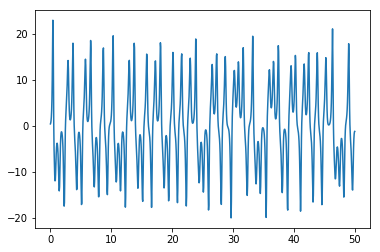

In [383]:
time = output[0]
plt.plot(time, output[1][0])
plt.show()

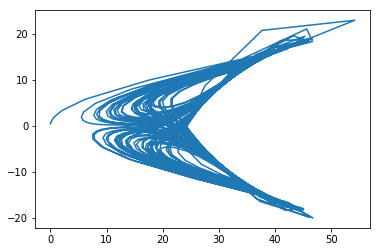

In [384]:
plt.plot(output[1][2], output[1][0])
plt.show()

In [394]:
from mpl_toolkits import mplot3d
%matplotlib notebook

<IPython.core.display.Javascript object>


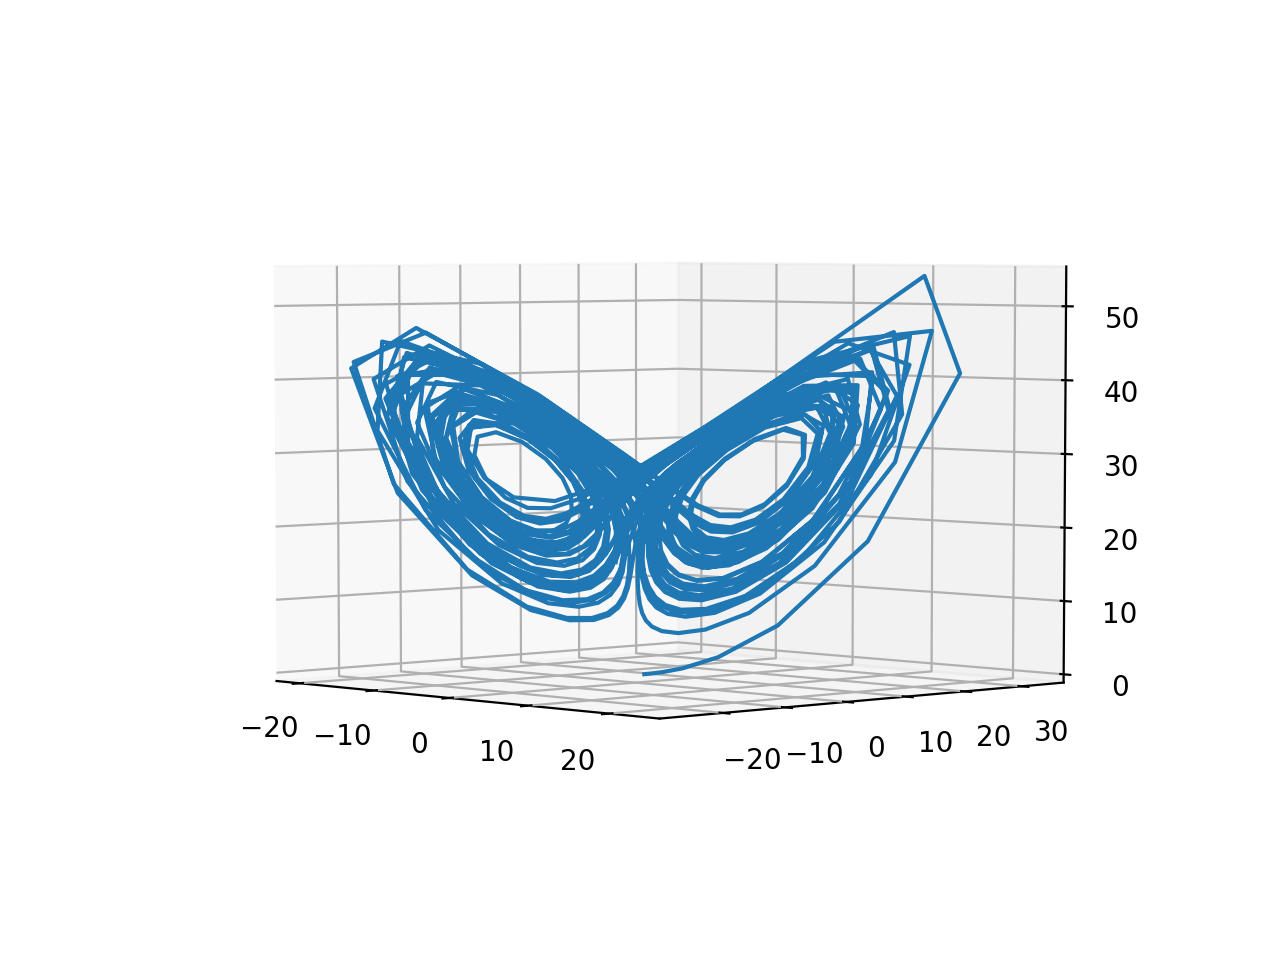

In [400]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [401]:
ax.plot3D(output[1][0], output[1][1], output[1][2])
fig.show()